## Importing libraries

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.svm import SVC
from sklearn.metrics import f1_score

## Data pre-processing

In [21]:
# Read the response_csv and time_csv into DataFrames
# response_df = pd.read_csv('merged_response.csv')
# time_df = pd.read_csv('data/timeFile_20230904_1513.csv')
# Read the response_csv and time_csv into DataFrames
response_df = pd.read_csv('merged_response.csv')
time_df = pd.read_csv('merged_time.csv')

# Remove spaces from column names in response_df
response_df.columns = response_df.columns.str.strip()

# Remove spaces from column names in time_df
time_df.columns = time_df.columns.str.strip()
# Remove spaces from column values in response_df
response_df = response_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove spaces from column values in time_df
time_df = time_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Specify the time_window in milliseconds
time_window = 5000  # Adjust this value as needed

# Function to calculate statistics within the time_window
def calculate_statistics(row):
    start_time = row['Elapsed Time (ms)']
    end_time = start_time + time_window
    relevant_data = time_df[(time_df['Elapsed Time (ms)'] >= start_time) & (time_df['Elapsed Time (ms)'] <= end_time)]
    pitch_values = relevant_data['Pitch'].round().astype(int)
    yaw_values = relevant_data['Yaw'].round().astype(int)
    roll_values = relevant_data['Roll'].round().astype(int)

    std_pitch = pitch_values.std()[1]
    var_pitch = pitch_values.var()[1]
    mean_pitch = pitch_values.mean()[1]
    mode_pitch = mode(pitch_values, axis=None)[0][0]
    median_pitch = pitch_values.median()[1]

    std_yaw = yaw_values.std()
    var_yaw = yaw_values.var()
    mean_yaw = yaw_values.mean()
    mode_yaw = mode(yaw_values, axis=None)[0][0]
    median_yaw = yaw_values.median()

    std_roll = roll_values.std()
    var_roll = roll_values.var()
    mean_roll = roll_values.mean()
    mode_roll = mode(roll_values, axis=None)[0][0]
    median_roll = roll_values.median()

    return pd.Series({
        'std_pitch': round(std_pitch, 2),
        'var_pitch': round(var_pitch, 2),
        'mean_pitch': round(mean_pitch, 2),
        'mode_pitch': round(mode_pitch,2),   # Assuming this will always be a whole number
        'median_pitch': round(median_pitch, 2),
        'std_yaw': round(std_yaw, 2),
        'var_yaw': round(var_yaw, 2),
        'mean_yaw': round(mean_yaw, 2),
        'mode_yaw': round(mode_yaw,2),       # Assuming this will always be a whole number
        'median_yaw': round(median_yaw, 2),
        'std_roll': round(std_roll, 2),
        'var_roll': round(var_roll, 2),
        'mean_roll': round(mean_roll, 2),
        'mode_roll': round(mode_roll,2),     # Assuming this will always be a whole number
        'median_roll': round(median_roll, 2)
    })

# Convert 'Pitch', 'Yaw', and 'Roll' to integers in response_df and time_df
response_df['Pitch'] = response_df['Pitch'].round().astype(int)
response_df['Yaw'] = response_df['Yaw'].round().astype(int)
response_df['Roll'] = response_df['Roll'].round().astype(int)

time_df['Pitch'] = time_df['Pitch'].round().astype(int)
time_df['Yaw'] = time_df['Yaw'].round().astype(int)
time_df['Roll'] = time_df['Roll'].round().astype(int)

# Apply the function to each row in the response DataFrame
statistics_df = response_df.apply(calculate_statistics, axis=1)

In [22]:
# Concatenate the statistics DataFrame with the response DataFrame
merged_df = pd.concat([response_df, statistics_df], axis=1)

# Create the 'attentive' column
merged_df['Attentive'] = response_df['Correct'].apply(lambda x: 0 if x == 'No' else 1)

# Save the final DataFrame to a new CSV file
merged_df.to_csv('responseFile_with_statistics_reversed.csv', index=False, float_format='%.2f')

## Train-Test split

In [23]:
# Read your preproces
df = pd.read_csv('responseFile_with_statistics_reversed.csv')

df = df.dropna()

# Select the features and the target variable
features = df[[
    'Yaw',
    'Pitch',
    'Roll',
    'std_pitch',
    'var_pitch',
    'mean_pitch',
    'median_pitch',
    'std_yaw',
    'var_yaw',
    'mean_yaw',
    'median_yaw',
    'std_roll',
    'var_roll',
    'mean_roll',
    'median_roll'
    ]]

# target class
y = df['Attentive']

# Scale the data
sc = StandardScaler()
features_scaled = sc.fit_transform(features)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, stratify=y, test_size=0.2, random_state=42)

F1 score for test data: 87.25%
Accuracy: 0.9137055837563451
Confusion Matrix:
[[  0  17]
 [  0 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.91      1.00      0.95       180

    accuracy                           0.91       197
   macro avg       0.46      0.50      0.48       197
weighted avg       0.83      0.91      0.87       197



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


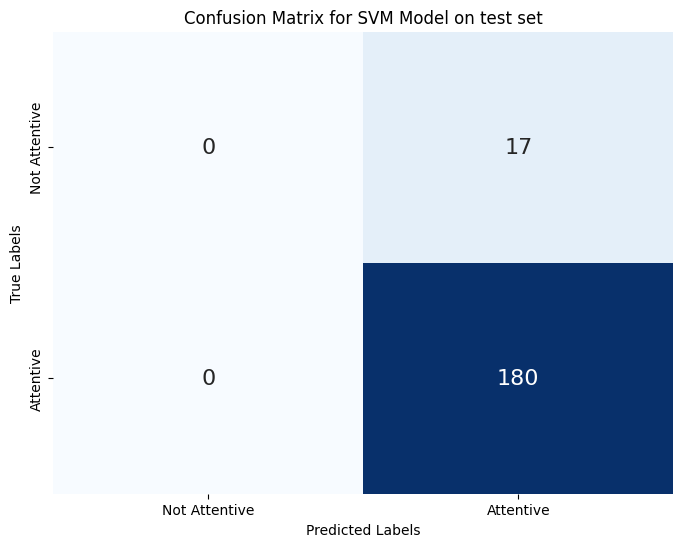

In [25]:
# Create and train the Support Vector Machine (SVM) model
svm = SVC(kernel='linear')  # You can choose different kernels (linear, radial basis function, etc.)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score for test data: {score*100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model on test set') 
plt.show()

F1 score for test data: 87.43%
Accuracy: 0.9149746192893401
Confusion Matrix:
[[  0  67]
 [  0 721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.91      1.00      0.96       721

    accuracy                           0.91       788
   macro avg       0.46      0.50      0.48       788
weighted avg       0.84      0.91      0.87       788



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


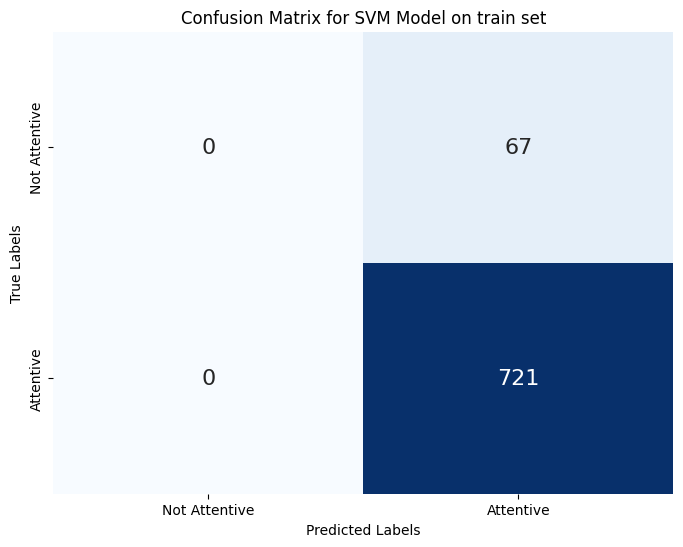

In [26]:
# Make predictions on the test set
y_pred = svm.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
confusion = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

score = f1_score(y_train, y_pred, average='weighted')
print(f'F1 score for test data: {score*100:.2f}%')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model on train set')
plt.show()


## Random Forest

F1 score for train data: 100.00%
Accuracy: 1.0
Confusion Matrix:
[[ 67   0]
 [  0 721]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       721

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



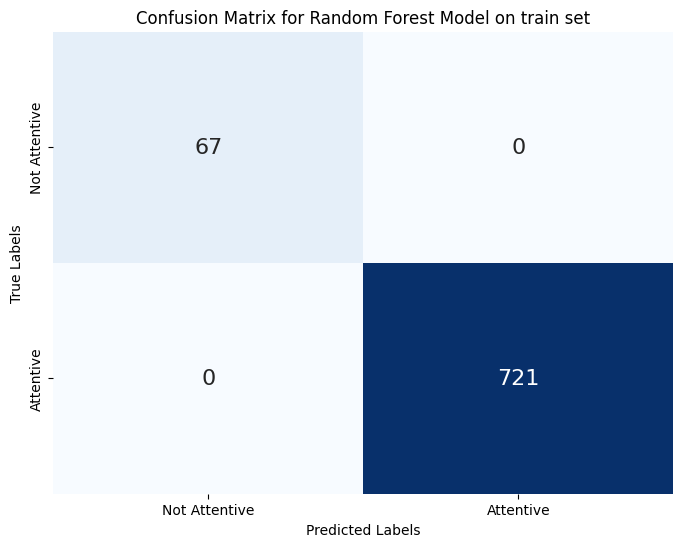

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
confusion = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

score = f1_score(y_train, y_pred, average='weighted')
print(f'F1 score for train data: {score*100:.2f}%')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model on train set')
plt.show()

F1 score for test data: 87.00%
Accuracy: 0.9086294416243654
Confusion Matrix:
[[  0  17]
 [  1 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.91      0.99      0.95       180

    accuracy                           0.91       197
   macro avg       0.46      0.50      0.48       197
weighted avg       0.83      0.91      0.87       197



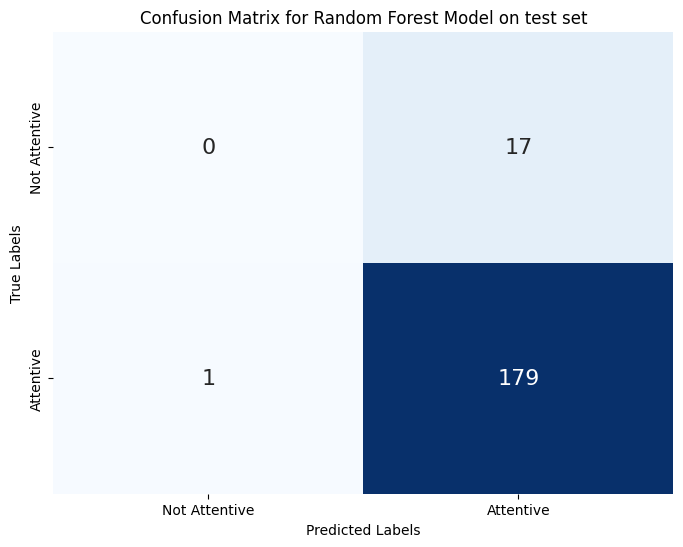

In [28]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score for test data: {score*100:.2f}%')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model on test set')
plt.show()

## Neural Network

In [30]:

# Define the ANN model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.7),
    Dense(32, activation='relu'),
    Dropout(0.7),
    Dense(8, activation='relu'),
    Dropout(0.25), 
    Dense(1, activation='sigmoid')
])

In [31]:
# Compile the model
lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), class_weight={0: 5, 1: 1}, verbose=0)

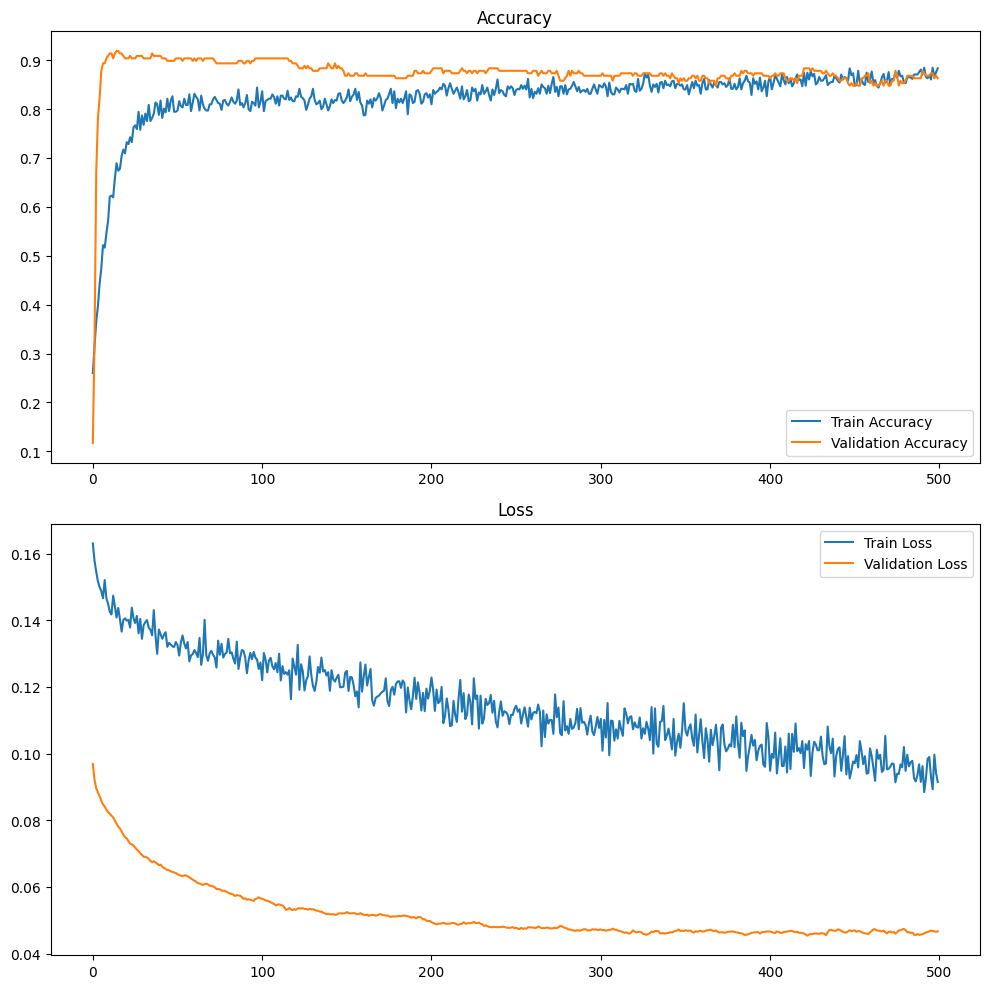

In [33]:
# Plot accuracy and loss
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
ax[1].set_title('Loss')

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.8629441624365483
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        17
           1       0.92      0.93      0.93       180

    accuracy                           0.86       197
   macro avg       0.53      0.53      0.53       197
weighted avg       0.85      0.86      0.86       197



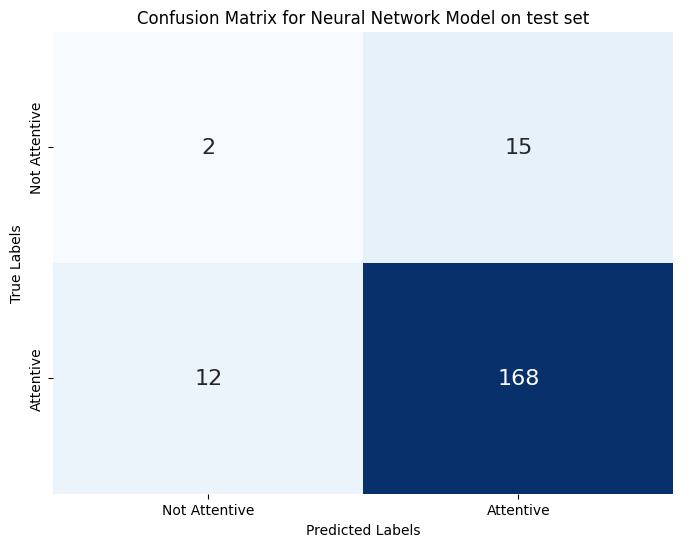

In [34]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on test set')
plt.show()

In [35]:
score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score for test data: {score*100:.2f}%')

F1 score for test data: 85.69%


25/25 [==============================] - 0s 2ms/step
Accuracy: 0.8629441624365483
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        67
           1       0.98      0.93      0.95       721

    accuracy                           0.92       788
   macro avg       0.75      0.85      0.79       788
weighted avg       0.94      0.92      0.93       788



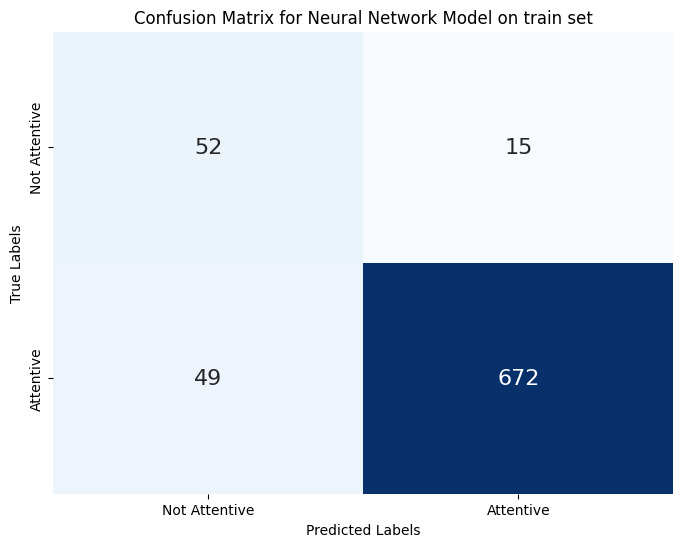

In [36]:
y_pred = (model.predict(X_train) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_train, y_pred)

report = classification_report(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on train set')
plt.show()

In [37]:
score = f1_score(y_train, y_pred, average='weighted')
print(f'F1 score for training data: {score*100:.2f}%')

F1 score for training data: 92.60%
